## World’s Fastest Cars Image Classification

As cars have advanced over the years, so have their top speeds. Not too long ago, surpassing the 200 mph mark was unthinkable. In 1987, the Ferrari F40 became the first production car to eclipse the 200 mph barrier, with an official top speed rated at 201 mph. These cars shatter that figure with ease. 

A list of some of these great cars include:

Bugatti Chiron, SSC Tuatara, Koenigsegg Agera RS, McLaren Speedtail,Lamborghini Veneno, Aston Martin One 77

Reference: https://www.roadandtrack.com/car-culture/g6459/fastest-cars-in-the-world/
![Bugatti Chiron](https://www.bugatti.com/fileadmin/_processed_/sei/p159/se-image-25bc01bbe5abc0a924bd82b0fb40131d.webp)

### Data Collection

For this problem, the dataset is collected from google images using the 'simple_image_download' python package. The 'simple_image_download' package has a script that lets us search for urls of images from google images using tags and/or download them automatically onto the local computer. There are a total of 11 war planes. 

In [1]:
# import simple_image_download.simple_image_download as simp

In [2]:
# my_downloader = simp.Downloader()

In [3]:
category = ['BugattiChiron', 'SSCTuatara', 'KoenigseggAgeraRS', 'McLarenSpeedtail','LamborghiniVeneno', 'AstonMartinOne77']

In [4]:
# for plane in category:
#     my_downloader.download(plane, limit=700)

### Exploring the dataset

In [87]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torch.utils.data.dataloader import default_collate
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
project_name='final_project'

The dataset is stored in the directory `/dataset`. It contains 2 folders `train` and `test`, containing the training set (300 images) and test set (100 images) respectively. Each of them contains 5 folders, one for each class of images. Let's verify this using `os.listdir`.

In [7]:
data_dir = './data'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['AstonMartinOne77', 'BugattiChiron', 'KoenigseggAgeraRS', 'LamborghiniVeneno', 'McLarenSpeedtail', 'SSCTuatara']


Let's look inside a couple of folders, one from the training set and another from the test set. 

In [8]:
AstonMartinOne77_files = os.listdir(data_dir + "/train/AstonMartinOne77")
print('No. of training examples for AstonMartinOne77:', len(AstonMartinOne77_files))
print(AstonMartinOne77_files[:5])

No. of training examples for AstonMartinOne77: 350
['AstonMartinOne77_0.jpeg', 'AstonMartinOne77_10.jpeg', 'AstonMartinOne77_101.jpeg', 'AstonMartinOne77_102.jpeg', 'AstonMartinOne77_104.jpeg']


In [9]:
BugattiChiron_files = os.listdir(data_dir + "/test/BugattiChiron")
print("No. of test examples for BugattiChiron:", len(BugattiChiron_files))
print(BugattiChiron_files[:5])

No. of test examples for BugattiChiron: 50
['BugattiChiron_148.jpeg', 'BugattiChiron_181.jpeg', 'BugattiChiron_204.jpeg', 'BugattiChiron_229.jpeg', 'BugattiChiron_230.jpeg']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.

In [10]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 375, 500]) 0


tensor([[[0.6549, 0.6588, 0.6588,  ..., 0.3059, 0.3412, 0.3608],
         [0.3804, 0.4471, 0.5412,  ..., 0.5137, 0.4745, 0.4431],
         [0.1098, 0.1176, 0.1216,  ..., 0.6706, 0.6588, 0.6549],
         ...,
         [0.2627, 0.2627, 0.2549,  ..., 0.3961, 0.4039, 0.4039],
         [0.2235, 0.2510, 0.2588,  ..., 0.4510, 0.3529, 0.3647],
         [0.2314, 0.2510, 0.2667,  ..., 0.3529, 0.4471, 0.3137]],

        [[0.6471, 0.6510, 0.6510,  ..., 0.2980, 0.3333, 0.3529],
         [0.3725, 0.4392, 0.5333,  ..., 0.5059, 0.4667, 0.4353],
         [0.1020, 0.1098, 0.1137,  ..., 0.6627, 0.6510, 0.6471],
         ...,
         [0.2549, 0.2549, 0.2471,  ..., 0.3961, 0.4039, 0.4039],
         [0.2157, 0.2431, 0.2510,  ..., 0.4510, 0.3529, 0.3647],
         [0.2235, 0.2431, 0.2588,  ..., 0.3529, 0.4471, 0.3137]],

        [[0.6510, 0.6549, 0.6549,  ..., 0.3098, 0.3451, 0.3647],
         [0.3765, 0.4431, 0.5373,  ..., 0.5176, 0.4784, 0.4471],
         [0.1059, 0.1137, 0.1176,  ..., 0.6745, 0.6627, 0.

The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [12]:
print(dataset.classes)

['AstonMartinOne77', 'BugattiChiron', 'KoenigseggAgeraRS', 'LamborghiniVeneno', 'McLarenSpeedtail', 'SSCTuatara']


In [13]:
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [14]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset.

Label:  AstonMartinOne77 (0)


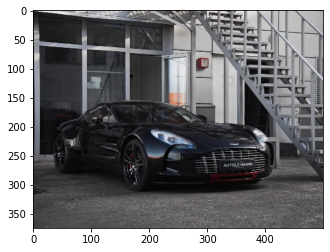

In [15]:
show_example(*dataset[0])

Label:  LamborghiniVeneno (3)


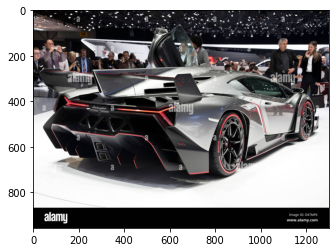

In [16]:
show_example(*dataset[1099])

### Save and upload your notebook

Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. [Jovian](https://jovian.ai/platform-features) offers an easy way of saving and sharing your Jupyter notebooks online.

In [17]:
!pip install jovian --upgrade -q

In [18]:
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gopirevathisreenivasan/final-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/gopirevathisreenivasan/final-project


'https://jovian.ai/gopirevathisreenivasan/final-project'

`jovian.commit` uploads the notebook to your Jovian account, captures the Python environment, and creates a shareable link for your notebook, as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

## Training and Validation Datasets

In [19]:
random_seed = 42
torch.manual_seed(random_seed)

In [20]:
train_tfms_s = tt.Compose([tt.Resize((128, 128)), tt.ToTensor()])
valid_tfms_s = tt.Compose([tt.Resize((128, 128)), tt.ToTensor()])

In [21]:
train_ds_s = ImageFolder(data_dir+'/train', train_tfms_s)
valid_ds_s = ImageFolder(data_dir+'/test', valid_tfms_s)

In [22]:
img, label = valid_ds_s[45]
img.shape

torch.Size([3, 128, 128])

In [23]:
batch_size = 128

In [24]:
train_dl_s = DataLoader(train_ds_s, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_s = DataLoader(valid_ds_s, batch_size*2, num_workers=3, pin_memory=True)

In [25]:
for images, label in train_dl_s:
    print(images.shape)
    break
    

torch.Size([128, 3, 128, 128])


### Computing Image Stats

In [26]:
def image_stat(dataloader, dataset):    
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])

    # loop through images
    for inputs, label in tqdm(dataloader):
        psum    += inputs.sum(axis        = [0, 2, 3])
        psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])
    count = len(dataset) * 256 * 256

    # mean and std
    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    # output
    print('mean: '  + str(total_mean))
    print('std:  '  + str(total_std))
    return total_mean, total_std

In [27]:
train_mean, train_std = image_stat(train_dl_s, train_ds_s)

  0%|          | 0/17 [00:00<?, ?it/s]

mean: tensor([0.1136, 0.1124, 0.1108])
std:  tensor([0.2491, 0.2455, 0.2446])


In [28]:
valid_mean, valid_std = image_stat(valid_dl_s, valid_ds_s)

  0%|          | 0/2 [00:00<?, ?it/s]

mean: tensor([0.1162, 0.1152, 0.1136])
std:  tensor([0.2510, 0.2475, 0.2473])


In [29]:
stack_mean = torch.stack((train_mean,valid_mean))
stack_std = torch.stack((train_std, valid_std)) 

In [30]:
total_mean = torch.mean(stack_mean, dim = 0)
total_std = torch.mean(stack_std, dim = 0)

In [31]:
stats = torch.stack((total_mean,total_std))

In [32]:
stats

tensor([[0.1149, 0.1138, 0.1122],
        [0.2501, 0.2465, 0.2459]])

In [33]:
train_tfms = tt.Compose([tt.Resize((128, 128),antialias=True),
                         tt.RandomCrop(128, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((128, 128),antialias=True),tt.ToTensor(), tt.Normalize(*stats)])

We can now create data loaders for training and validation, to load the data in batches

In [34]:
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)
val_size = len(valid_ds)

In [35]:
batch_size = 32

In [36]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=3, pin_memory=True)

In [37]:
jovian.log_dataset(val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


In [38]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gopirevathisreenivasan/final-project" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/gopirevathisreenivasan/final-project


'https://jovian.ai/gopirevathisreenivasan/final-project'

## CNN Model

In [39]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 64 x 64
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 32 x 32

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4), # output: 128 x 8 x 8
            
            nn.Flatten(), 
            nn.Linear(128*8*8, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 6))
        
    def forward(self, xb):
        return self.network(xb)

In [41]:
model = CnnModel()
model

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=8192, out_features=2048, bias=True)
    (17): ReLU()
    (18): Linear(in_features=2048, 

In [42]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [43]:
device = get_default_device()
device

device(type='cuda')

In [44]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
to_device(model, device);

In [45]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, max_lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), max_lr)
    #sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    #optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [46]:
evaluate(model, valid_dl)

{'val_loss': 1.790879487991333, 'val_acc': 0.21875}

In [47]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [48]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [49]:
torch.cuda.empty_cache()

In [50]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   76905 KB |  296622 KB |    8078 MB |    8002 MB |\n|       from large pool |   75776 KB |  295488 KB |    8056 MB |    7982 MB |\n|       from small pool |    1129 KB |    2414 KB |      21 MB |      20 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   76905 KB |  296622 KB |    8078 MB |    8002 MB |\n|       from large pool |   75776 KB |  295488 KB |

In [51]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], train_loss: 1.7899, val_loss: 1.7628, val_acc: 0.2344
Epoch [1], train_loss: 1.7098, val_loss: 1.6696, val_acc: 0.2948
Epoch [2], train_loss: 1.6001, val_loss: 1.5946, val_acc: 0.3615
Epoch [3], train_loss: 1.5130, val_loss: 1.3999, val_acc: 0.4635
Epoch [4], train_loss: 1.3542, val_loss: 1.2385, val_acc: 0.5562
Epoch [5], train_loss: 1.2087, val_loss: 1.0224, val_acc: 0.6104
Epoch [6], train_loss: 1.0300, val_loss: 0.8855, val_acc: 0.6781
Epoch [7], train_loss: 0.8234, val_loss: 0.7892, val_acc: 0.6781
Epoch [8], train_loss: 0.6461, val_loss: 0.5098, val_acc: 0.8115
Epoch [9], train_loss: 0.4675, val_loss: 0.4036, val_acc: 0.8771


In [52]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [53]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

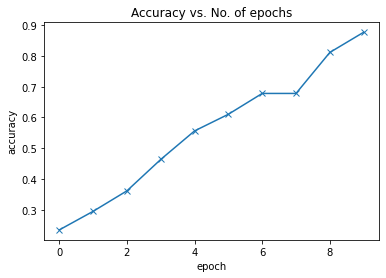

In [54]:
plot_accuracies(history)

In [55]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

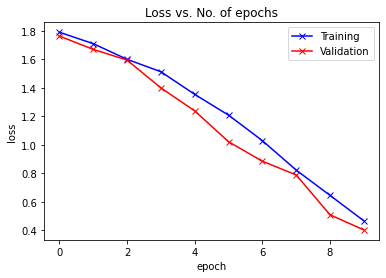

In [56]:
plot_losses(history)

In [57]:
torch.save(model.state_dict(), 'final-cnn.pth')

## ResNet 9 Architecture

## Model with Residual Blocks and Batch Normalization

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In [58]:
torch.cuda.empty_cache()

In [59]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  153811 KB |  707735 KB |    1481 GB |    1481 GB |\n|       from large pool |  151552 KB |  703040 KB |    1476 GB |    1476 GB |\n|       from small pool |    2259 KB |    6863 KB |       4 GB |       4 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |  153811 KB |  707735 KB |    1481 GB |    1481 GB |\n|       from large pool |  151552 KB |  703040 KB |

In [60]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase_R(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [73]:
def conv_block(in_channels, out_channels, pool=False, max_p = 2):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(max_p))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase_R):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64, pool=True)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True, max_p = 4)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [74]:
model = to_device(ResNet9(3, 6), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e

## Training the model

Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. 


* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.


* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. 


In [75]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [76]:
evaluate(model, valid_dl)

{'val_loss': 1.788906455039978, 'val_acc': 0.2135416716337204}

In [77]:
epochs = 10
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [78]:
torch.cuda.empty_cache()

In [79]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  291814 KB |    1431 MB |    1511 GB |    1511 GB |\n|       from large pool |  282240 KB |    1427 MB |    1506 GB |    1506 GB |\n|       from small pool |    9574 KB |      13 MB |       5 GB |       5 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |  291814 KB |    1431 MB |    1511 GB |    1511 GB |\n|       from large pool |  282240 KB |    1427 MB |

In [81]:
%%time
history_1 = fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00028, train_loss: 1.8844, val_loss: 1.2559, val_acc: 0.5188
Epoch [1], last_lr: 0.00076, train_loss: 1.2845, val_loss: 1.3722, val_acc: 0.4979
Epoch [2], last_lr: 0.00100, train_loss: 1.0017, val_loss: 0.6470, val_acc: 0.8000
Epoch [3], last_lr: 0.00095, train_loss: 0.5460, val_loss: 0.8526, val_acc: 0.7167
Epoch [4], last_lr: 0.00081, train_loss: 0.2967, val_loss: 0.1151, val_acc: 0.9844
Epoch [5], last_lr: 0.00061, train_loss: 0.1448, val_loss: 0.0954, val_acc: 0.9781
Epoch [6], last_lr: 0.00039, train_loss: 0.0831, val_loss: 0.0529, val_acc: 0.9937
Epoch [7], last_lr: 0.00019, train_loss: 0.0355, val_loss: 0.0300, val_acc: 0.9969
Epoch [8], last_lr: 0.00005, train_loss: 0.0200, val_loss: 0.0253, val_acc: 0.9969
Epoch [9], last_lr: 0.00000, train_loss: 0.0159, val_loss: 0.0256, val_acc: 0.9969
CPU times: total: 7.34 s
Wall time: 10min 32s


In [82]:
train_time='10:32'

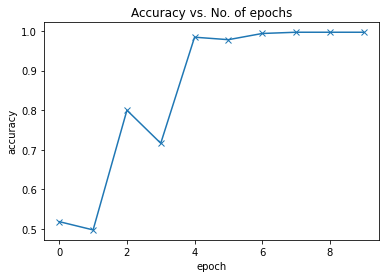

In [83]:
plot_accuracies(history_1)

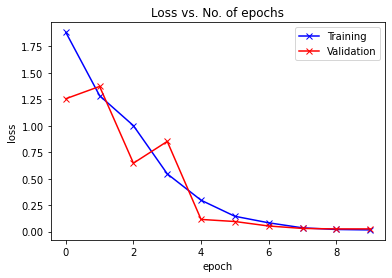

In [84]:
plot_losses(history_1)

In [85]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

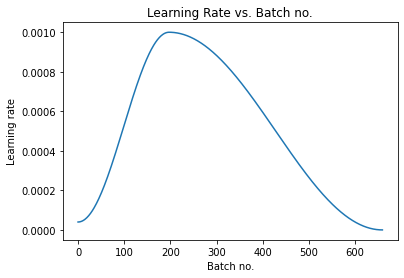

In [88]:
plot_lrs(history_1)

### Inference

CNN Model was able to achieve 87% accuracy with 22 layers in 10 epochs.

Resnet 9 Model was able to achieve a much higher accuracy (99.69%) with 9 layers in 10 epochs. This is because we used learning rate scheduling, gradient clipping, weight decay and batch normalization techniques. 

## Save and Commit

Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. As you try different ideas, make sure to record every experiment so you can look back and analyze the results.

In [89]:
torch.save(model.state_dict(), 'final-resnet9.pth')

In [90]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9',
                       weights = 'random',
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [91]:
jovian.log_metrics(val_loss=history_1[-1]['val_loss'], 
                   val_acc=history_1[-1]['val_acc'],
                   train_loss=history_1[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [93]:
jovian.commit(project=project_name, environment=None, outputs=['final-resnet9.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gopirevathisreenivasan/final-project" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/gopirevathisreenivasan/final-project


'https://jovian.ai/gopirevathisreenivasan/final-project'